# Preprocesamiento de Imagens 

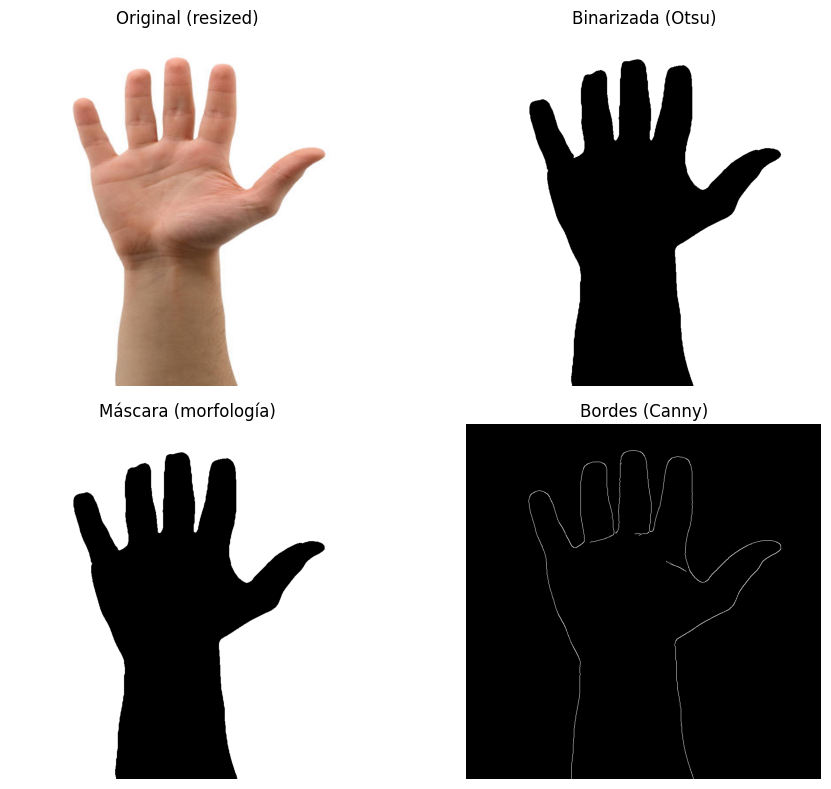

Guardado: data/procesadas/mano-abierta_mask.png, data/procesadas/mano-abierta_masked.png, data/procesadas/mano-abierta_edges.png


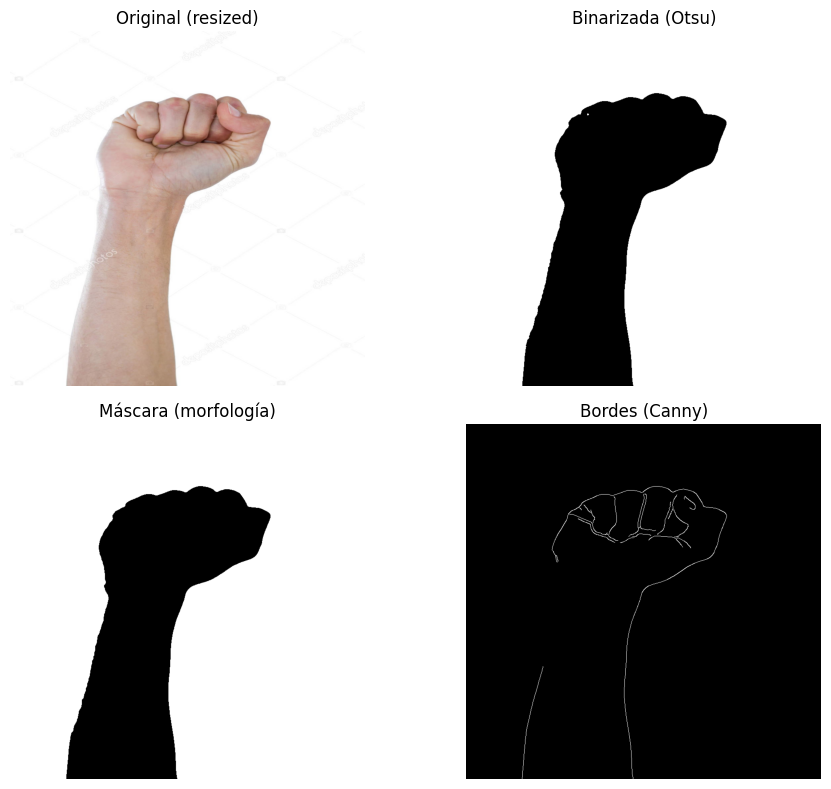

Guardado: data/procesadas/mano-cerrada_mask.png, data/procesadas/mano-cerrada_masked.png, data/procesadas/mano-cerrada_edges.png


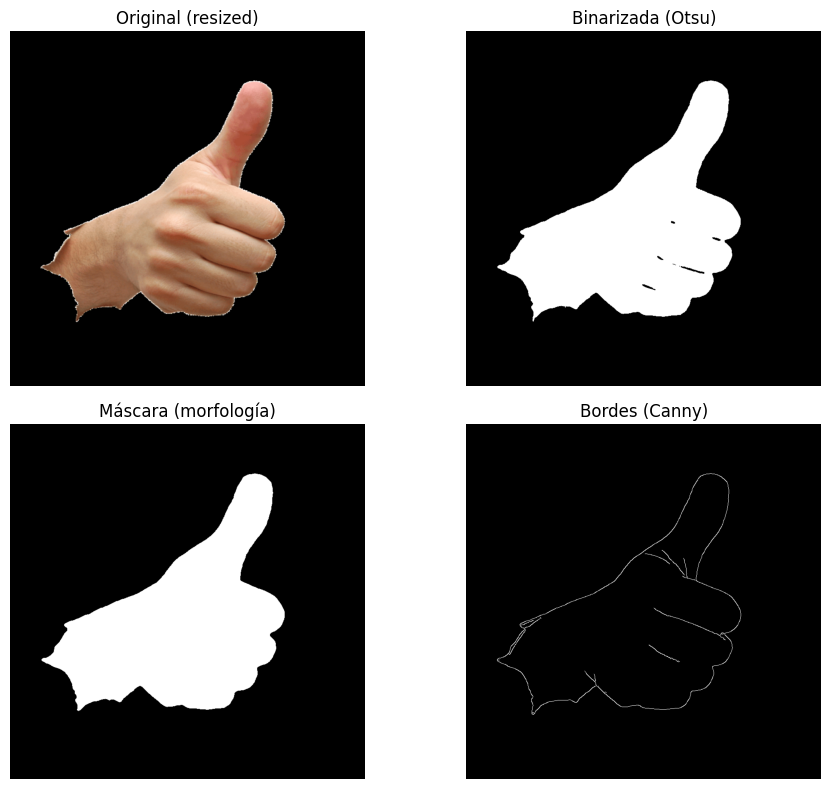

Guardado: data/procesadas/mano-pulgar_mask.png, data/procesadas/mano-pulgar_masked.png, data/procesadas/mano-pulgar_edges.png
Pipeline completado. Todas las imágenes procesadas con tamaño: (800, 800)


In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
# Parámetros
TARGET_SIZE = (800, 800)   # ambas imágenes quedarán de este tamaño (ancho, alto)
CANNY_THRESH1 = 50
CANNY_THRESH2 = 150
MEDIAN_KSIZE = 7          # debe ser impar >=3
MORPH_KERNEL = (7, 7)

# Rutas y lista
os.makedirs('data/procesadas', exist_ok=True)
imagenes = ['data/inputs/mano-abierta.jpg', 'data/inputs/mano-cerrada.jpg', 'data/inputs/mano-pulgar.png']

for imagen in imagenes:
    img = cv2.imread(imagen)
    if img is None:
        print(f"No se pudo leer la imagen '{imagen}'")
        continue

    # 0) Redimensionar para que todas queden igual
    img_resized = cv2.resize(img, TARGET_SIZE, interpolation=cv2.INTER_AREA)

    # 1) Gris
    gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)

    # 2) Filtro de mediana para ruido sal/pimienta
    median = cv2.medianBlur(gray, MEDIAN_KSIZE)

    # 3) Binarización Otsu (sobre la imagen filtrada)
    _, binarizada = cv2.threshold(median, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # 4) Morfología para limpiar la máscara
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, MORPH_KERNEL)
    img_morph = cv2.morphologyEx(binarizada, cv2.MORPH_CLOSE, kernel, iterations=2)
    img_morph = cv2.morphologyEx(img_morph, cv2.MORPH_OPEN, kernel, iterations=1)
    img_morph = (img_morph > 0).astype('uint8') * 255  # asegurar 0/255 uint8

    # 5) Canny (bordes) - aplicamos sobre la imagen suavizada (median)
    edges = cv2.Canny(median, CANNY_THRESH1, CANNY_THRESH2)

    # 6) Aplicar máscara a la imagen original en color
    masked_color = cv2.bitwise_and(img_resized, img_resized, mask=img_morph)

    # 7) Visualización ordenada (2x2)
    plt.figure(figsize=(10, 8))

    plt.subplot(2, 2, 1)
    plt.title('Original (resized)')
    plt.axis('off')
    plt.imshow(cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB))

    plt.subplot(2, 2, 2)
    plt.title('Binarizada (Otsu)')
    plt.axis('off')
    plt.imshow(binarizada, cmap='gray')

    plt.subplot(2, 2, 3)
    plt.title('Máscara (morfología)')
    plt.axis('off')
    plt.imshow(img_morph, cmap='gray')

    plt.subplot(2, 2, 4)
    plt.title('Bordes (Canny)')
    plt.axis('off')
    plt.imshow(edges, cmap='gray')

    plt.tight_layout()
    plt.show()

    # 8) Guardar resultados (mask, masked color y edges)
    base = os.path.splitext(os.path.basename(imagen))[0]
    mask_path = os.path.join('data/procesadas', f"{base}_mask.png")
    masked_color_path = os.path.join('data/procesadas', f"{base}_masked.png")
    edges_path = os.path.join('data/procesadas', f"{base}_edges.png")

    cv2.imwrite(mask_path, img_morph)                       # máscara 0/255
    cv2.imwrite(masked_color_path, masked_color)           # BGR guardado
    cv2.imwrite(edges_path, edges)                         # bordes

    print(f"Guardado: {mask_path}, {masked_color_path}, {edges_path}")

# Confirmación final: ambas imágenes procesadas tienen tamaño TARGET_SIZE.
print("Pipeline completado. Todas las imágenes procesadas con tamaño:", TARGET_SIZE)

## Transformaciones Geométricas
- Rotación
- Escalado
- Traslación
- Transformación afín


Transformaciones geométricas: mano-abierta


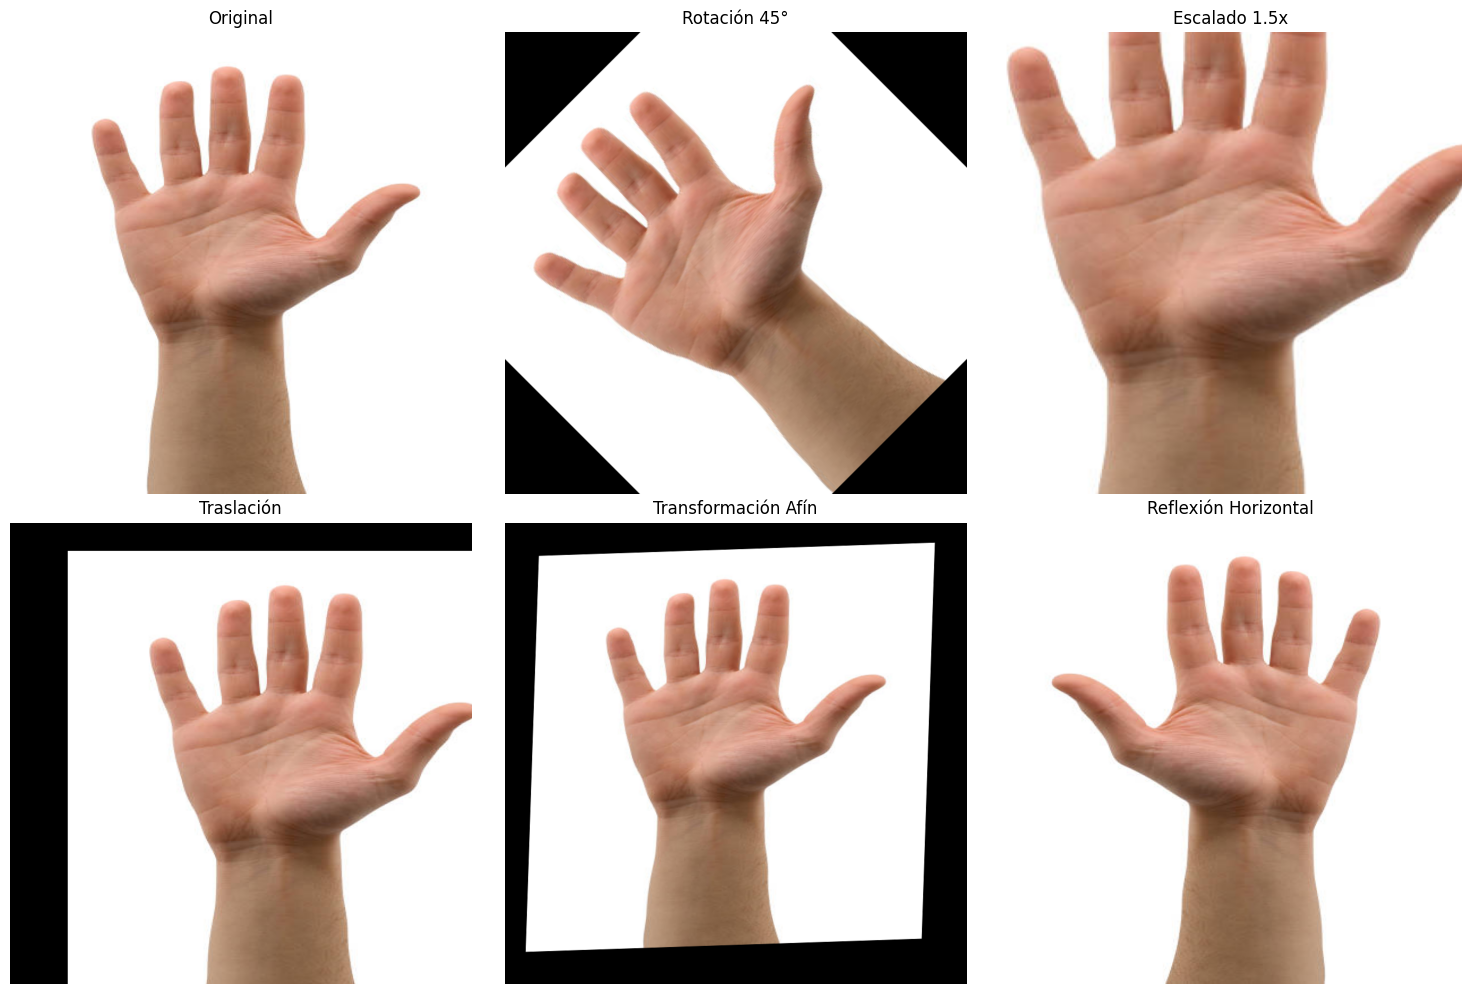

✓ Transformaciones guardadas en: data/procesadas/transformaciones/mano-abierta/

Transformaciones geométricas: mano-cerrada


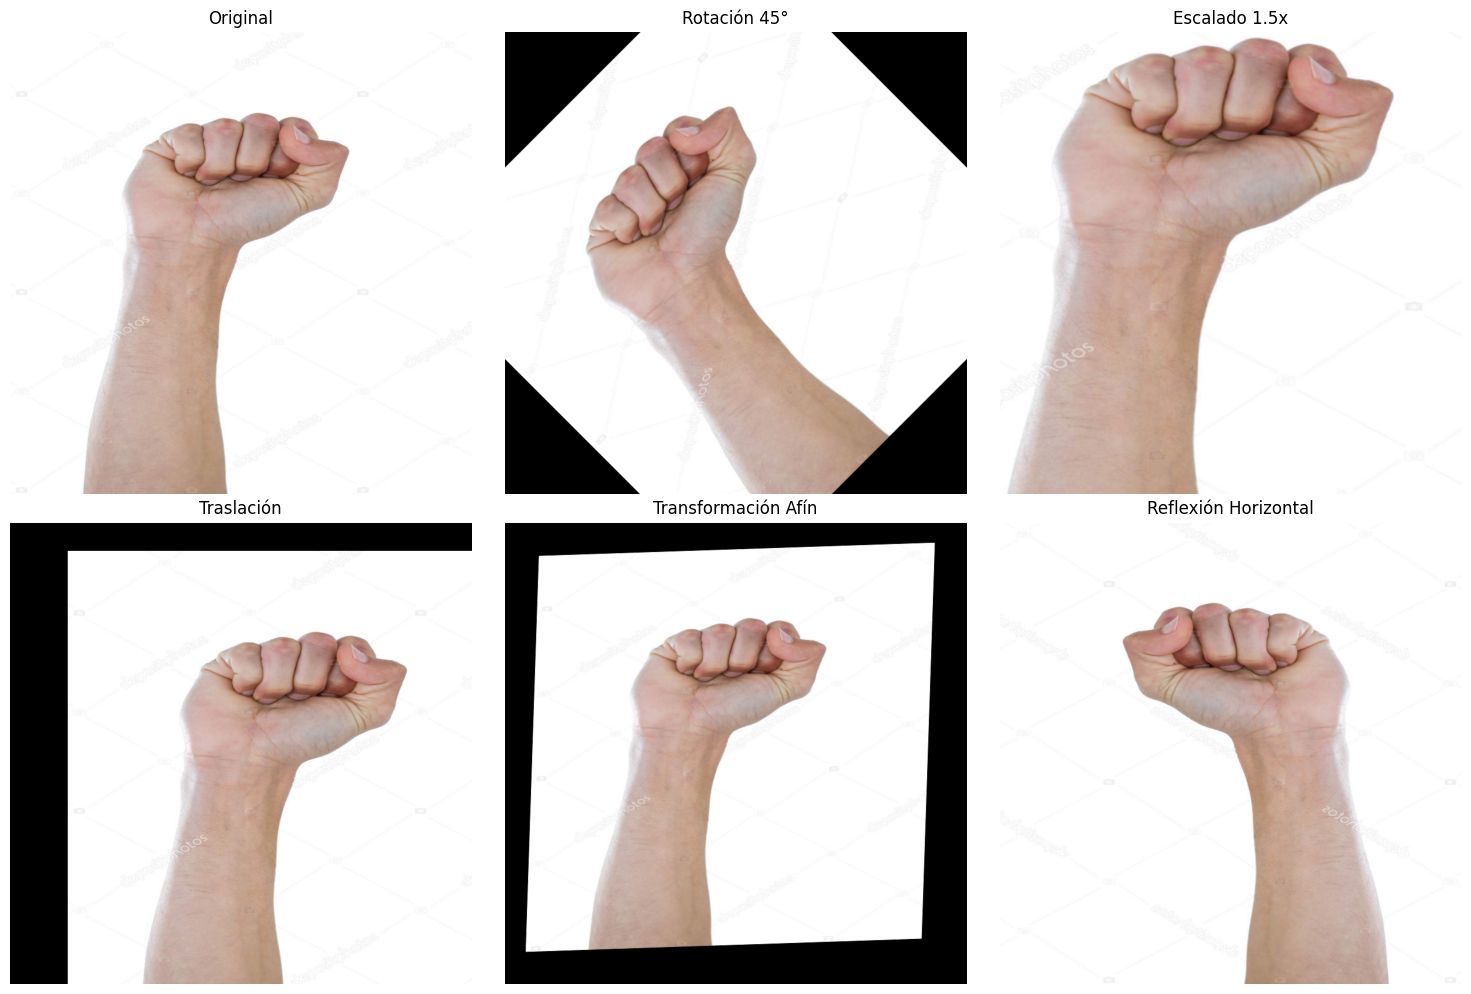

✓ Transformaciones guardadas en: data/procesadas/transformaciones/mano-cerrada/

Transformaciones geométricas: mano-pulgar


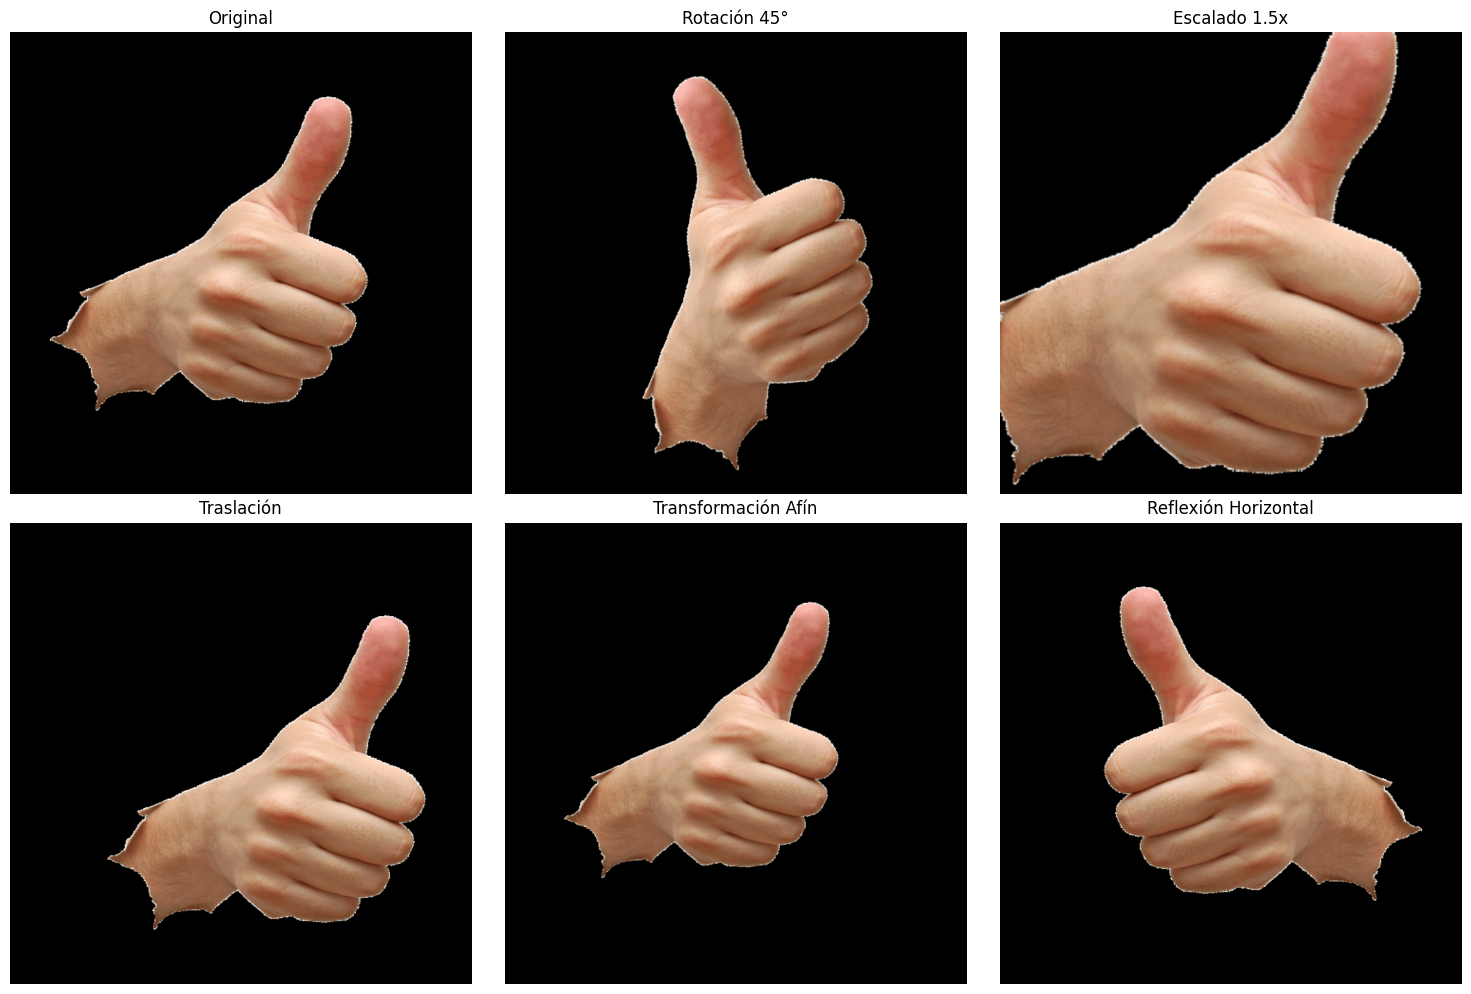

✓ Transformaciones guardadas en: data/procesadas/transformaciones/mano-pulgar/

¡Transformaciones geométricas completadas!


In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Crear carpeta para transformaciones geométricas
os.makedirs('data/procesadas/transformaciones', exist_ok=True)

imagenes = ['data/inputs/mano-abierta.jpg', 'data/inputs/mano-cerrada.jpg', 'data/inputs/mano-pulgar.png']

for imagen in imagenes:
    img_name = os.path.splitext(os.path.basename(imagen))[0]
    
    print(f"\n{'='*50}")
    print(f"Transformaciones geométricas: {img_name}")
    print(f"{'='*50}")
    
    img = cv2.imread(imagen)
    if img is None:
        print(f"No se pudo leer la imagen '{imagen}'")
        continue
    
    # Redimensionar para trabajar
    img_resized = cv2.resize(img, (800, 800), interpolation=cv2.INTER_AREA)
    height, width = img_resized.shape[:2]
    
    # Crear carpeta específica para esta imagen
    output_dir = os.path.join('data/procesadas/transformaciones', img_name)
    os.makedirs(output_dir, exist_ok=True)
    
    # 1. ROTACIÓN (45 grados)
    center = (width // 2, height // 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, 45, 1.0)
    img_rotated = cv2.warpAffine(img_resized, rotation_matrix, (width, height))
    cv2.imwrite(os.path.join(output_dir, "rotacion_45.jpg"), img_rotated)
    
    # 2. ESCALADO (1.5x)
    img_scaled = cv2.resize(img_resized, None, fx=1.5, fy=1.5, interpolation=cv2.INTER_LINEAR)
    # Recortar al tamaño original para visualización
    h, w = img_scaled.shape[:2]
    start_h, start_w = (h - height) // 2, (w - width) // 2
    img_scaled_crop = img_scaled[start_h:start_h+height, start_w:start_w+width]
    cv2.imwrite(os.path.join(output_dir, "escalado_1.5x.jpg"), img_scaled_crop)
    
    # 3. TRASLACIÓN (100px derecha, 50px abajo)
    translation_matrix = np.float32([[1, 0, 100], [0, 1, 50]])
    img_translated = cv2.warpAffine(img_resized, translation_matrix, (width, height))
    cv2.imwrite(os.path.join(output_dir, "traslacion.jpg"), img_translated)
    
    # 4. TRANSFORMACIÓN AFÍN (perspectiva simple)
    pts1 = np.float32([[50, 50], [width-50, 50], [50, height-50]])
    pts2 = np.float32([[100, 100], [width-100, 80], [80, height-100]])
    affine_matrix = cv2.getAffineTransform(pts1, pts2)
    img_affine = cv2.warpAffine(img_resized, affine_matrix, (width, height))
    cv2.imwrite(os.path.join(output_dir, "afin.jpg"), img_affine)
    
    # 5. REFLEXIÓN (espejo horizontal)
    img_flip = cv2.flip(img_resized, 1)
    cv2.imwrite(os.path.join(output_dir, "reflexion_horizontal.jpg"), img_flip)
    
    # Visualización
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    
    axes[0, 0].imshow(cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB))
    axes[0, 0].set_title('Original')
    axes[0, 0].axis('off')
    
    axes[0, 1].imshow(cv2.cvtColor(img_rotated, cv2.COLOR_BGR2RGB))
    axes[0, 1].set_title('Rotación 45°')
    axes[0, 1].axis('off')
    
    axes[0, 2].imshow(cv2.cvtColor(img_scaled_crop, cv2.COLOR_BGR2RGB))
    axes[0, 2].set_title('Escalado 1.5x')
    axes[0, 2].axis('off')
    
    axes[1, 0].imshow(cv2.cvtColor(img_translated, cv2.COLOR_BGR2RGB))
    axes[1, 0].set_title('Traslación')
    axes[1, 0].axis('off')
    
    axes[1, 1].imshow(cv2.cvtColor(img_affine, cv2.COLOR_BGR2RGB))
    axes[1, 1].set_title('Transformación Afín')
    axes[1, 1].axis('off')
    
    axes[1, 2].imshow(cv2.cvtColor(img_flip, cv2.COLOR_BGR2RGB))
    axes[1, 2].set_title('Reflexión Horizontal')
    axes[1, 2].axis('off')
    
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, "comparacion_transformaciones.jpg"), dpi=150, bbox_inches='tight')
    plt.show()
    
    print(f"✓ Transformaciones guardadas en: {output_dir}/")

print("\n¡Transformaciones geométricas completadas!")

## Ajuste de Contraste y Brillo
- Ajuste lineal de brillo/contraste
- Ecualización de histograma
- CLAHE (Contrast Limited Adaptive Histogram Equalization)
- Corrección gamma


Ajuste de contraste/brillo: mano-abierta


/tmp/ipykernel_54550/3607203685.py:103: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  axes[2, 2].hist(gray.ravel(), 256, [0, 256], color='blue', alpha=0.5, label='Original')
/tmp/ipykernel_54550/3607203685.py:104: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  axes[2, 2].hist(img_eq.ravel(), 256, [0, 256], color='red', alpha=0.5, label='Ecualizado')


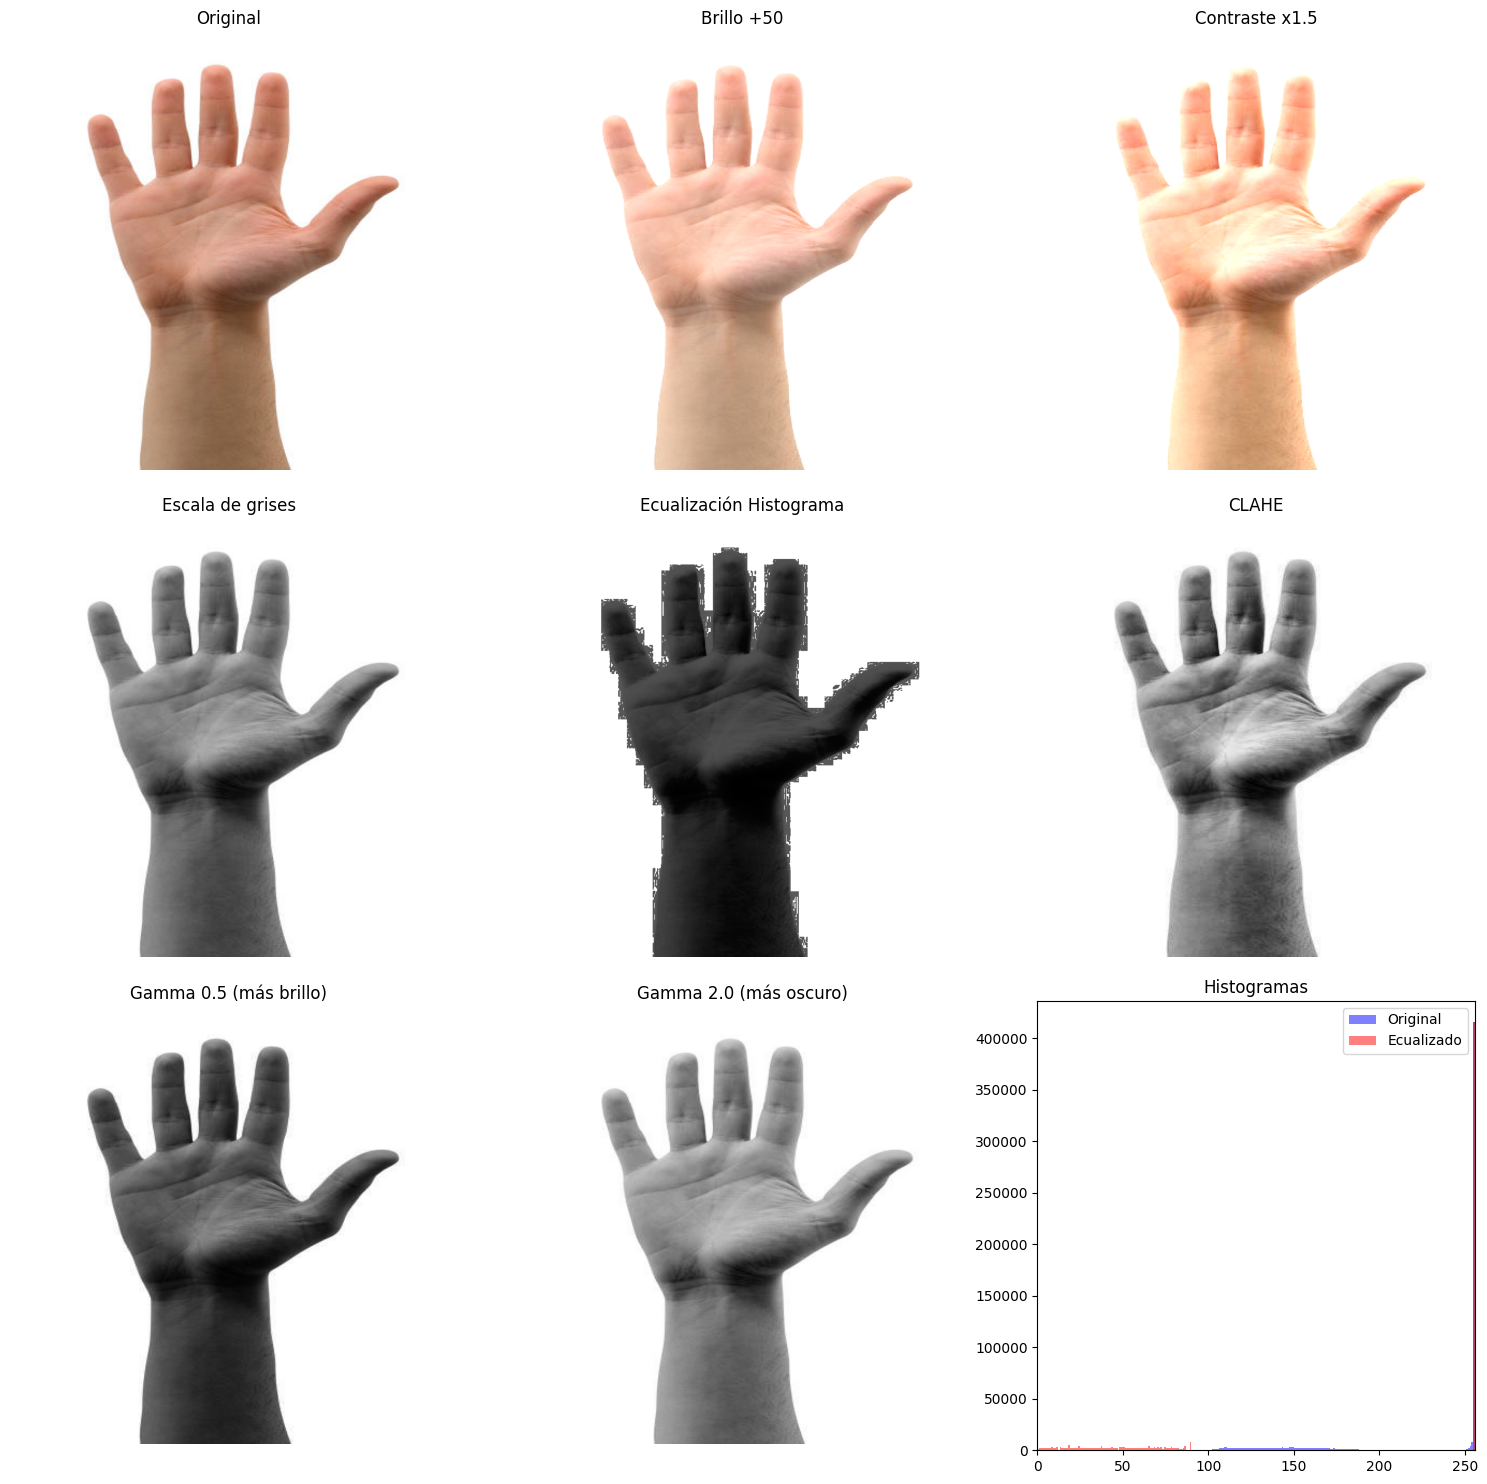

✓ Ajustes guardados en: data/procesadas/contraste_brillo/mano-abierta/

Ajuste de contraste/brillo: mano-cerrada


/tmp/ipykernel_54550/3607203685.py:103: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  axes[2, 2].hist(gray.ravel(), 256, [0, 256], color='blue', alpha=0.5, label='Original')
/tmp/ipykernel_54550/3607203685.py:104: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  axes[2, 2].hist(img_eq.ravel(), 256, [0, 256], color='red', alpha=0.5, label='Ecualizado')


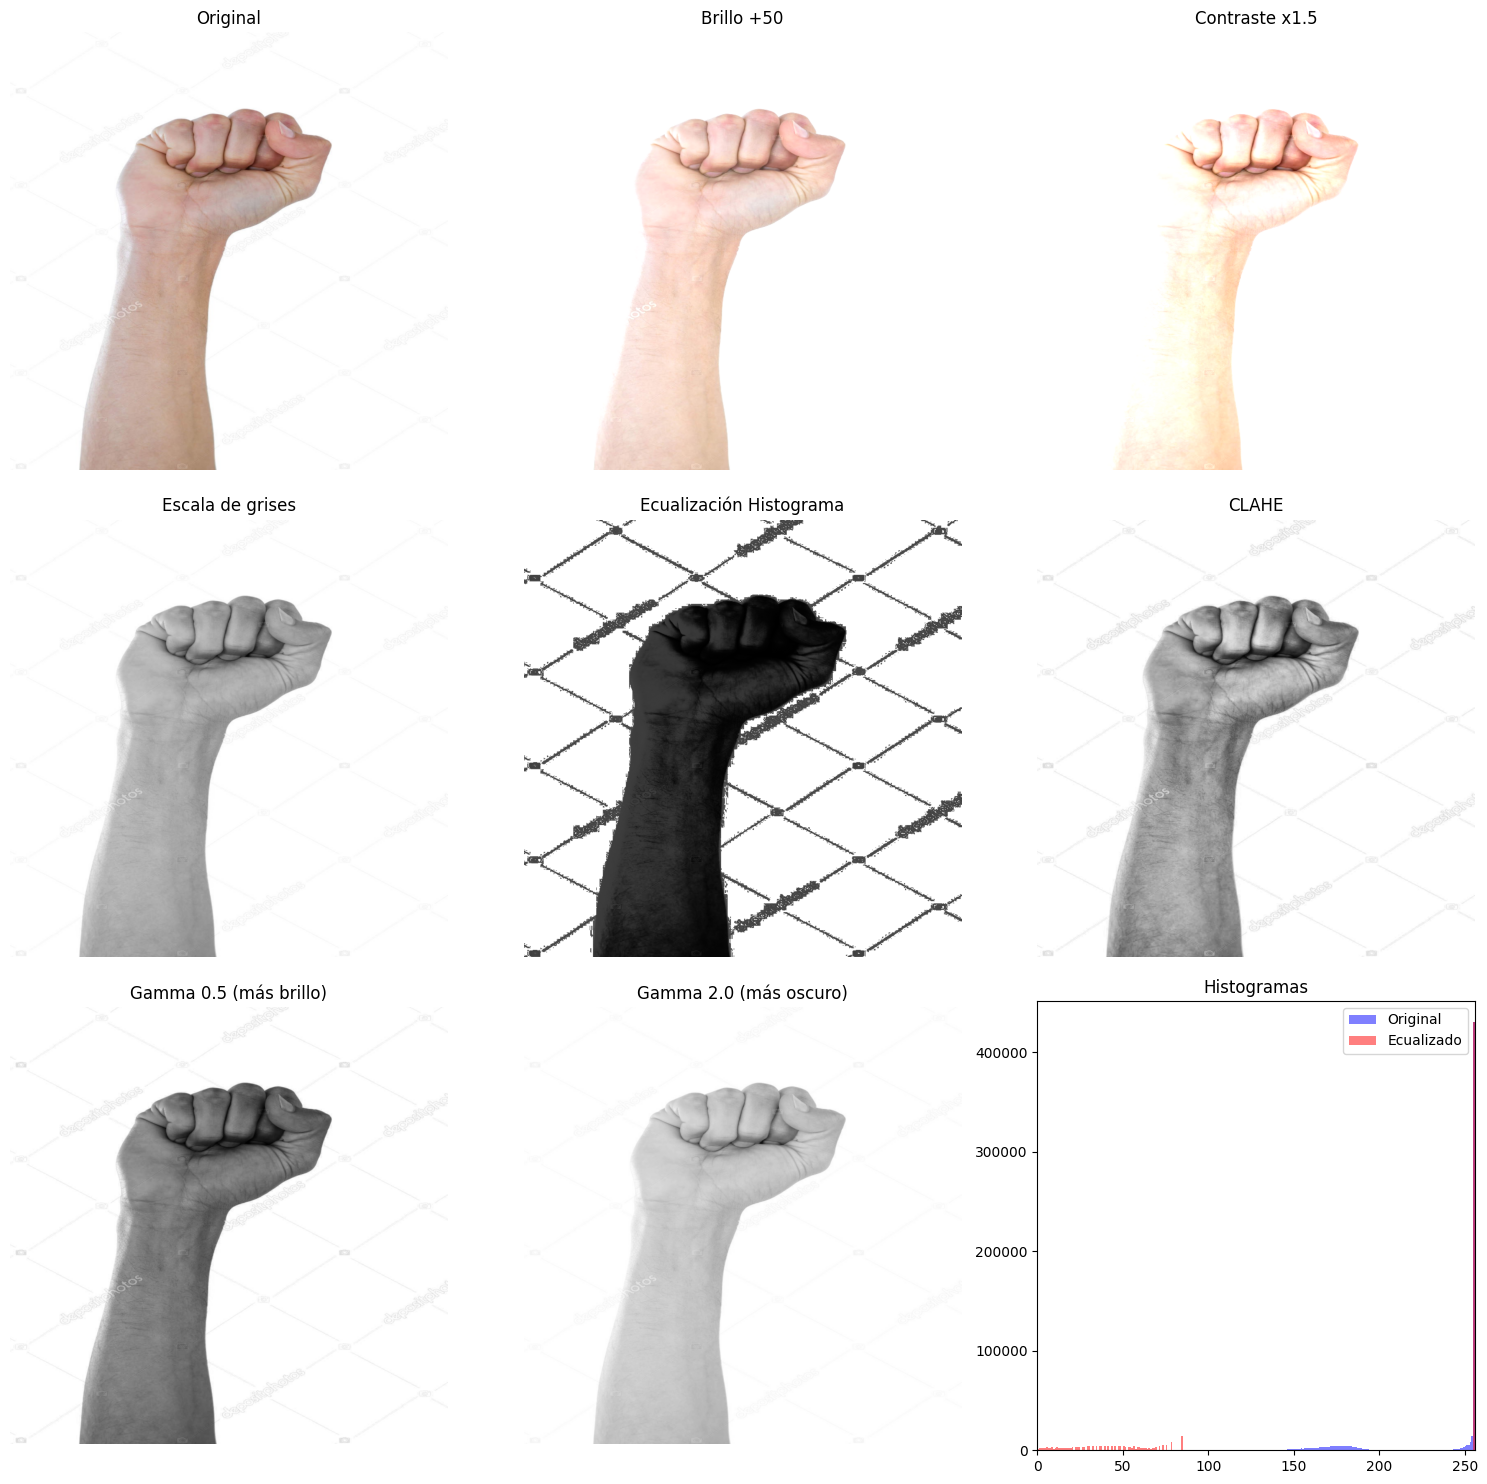

✓ Ajustes guardados en: data/procesadas/contraste_brillo/mano-cerrada/

Ajuste de contraste/brillo: mano-pulgar


/tmp/ipykernel_54550/3607203685.py:103: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  axes[2, 2].hist(gray.ravel(), 256, [0, 256], color='blue', alpha=0.5, label='Original')
/tmp/ipykernel_54550/3607203685.py:104: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  axes[2, 2].hist(img_eq.ravel(), 256, [0, 256], color='red', alpha=0.5, label='Ecualizado')


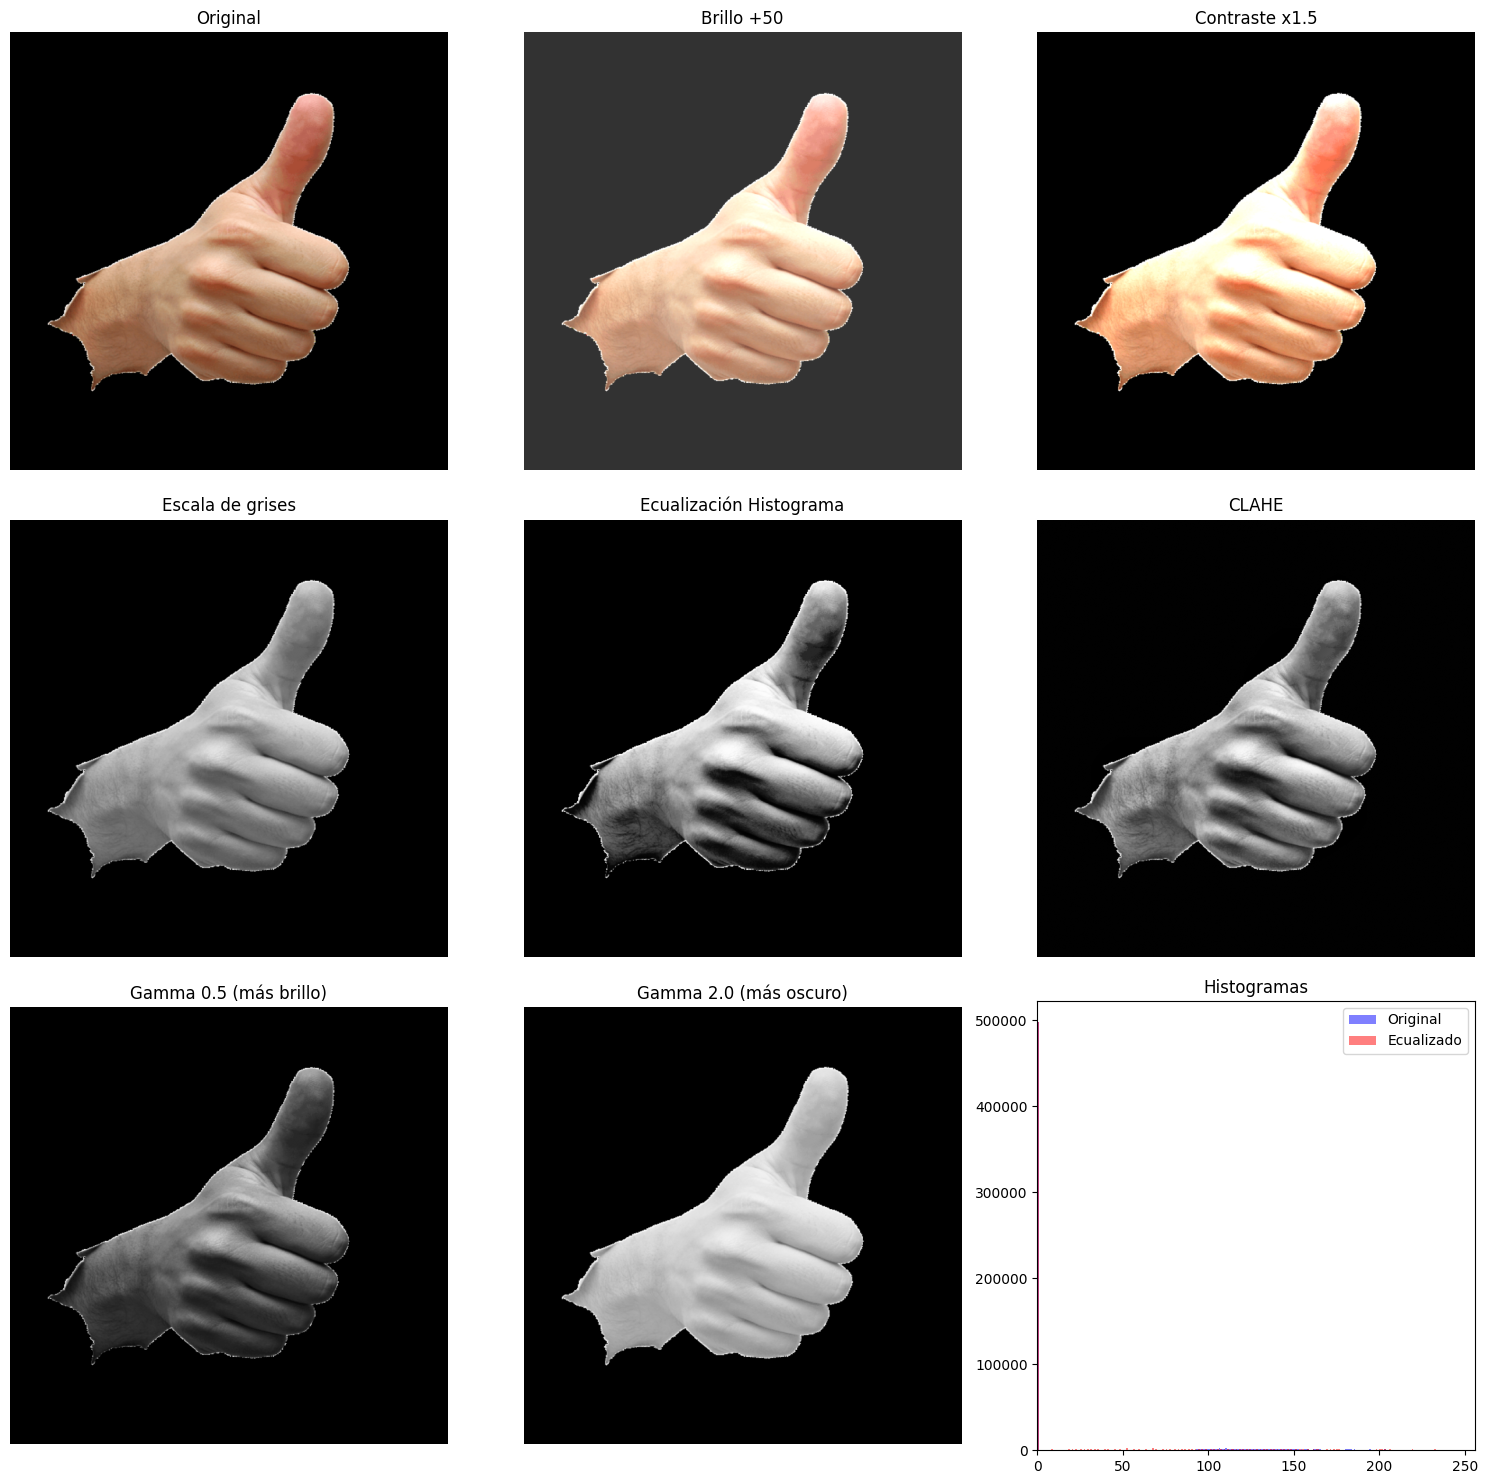

✓ Ajustes guardados en: data/procesadas/contraste_brillo/mano-pulgar/

¡Ajustes de contraste y brillo completados!


In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Crear carpeta para ajustes de contraste/brillo
os.makedirs('data/procesadas/contraste_brillo', exist_ok=True)

imagenes = ['data/inputs/mano-abierta.jpg', 'data/inputs/mano-cerrada.jpg', 'data/inputs/mano-pulgar.png']

def adjust_brightness_contrast(img, alpha=1.0, beta=0):
    """
    alpha: contraste (1.0-3.0)
    beta: brillo (0-100)
    """
    return cv2.convertScaleAbs(img, alpha=alpha, beta=beta)

def adjust_gamma(img, gamma=1.0):
    """Corrección gamma"""
    inv_gamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** inv_gamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
    return cv2.LUT(img, table)

for imagen in imagenes:
    img_name = os.path.splitext(os.path.basename(imagen))[0]
    
    print(f"\n{'='*50}")
    print(f"Ajuste de contraste/brillo: {img_name}")
    print(f"{'='*50}")
    
    img = cv2.imread(imagen)
    if img is None:
        print(f"No se pudo leer la imagen '{imagen}'")
        continue
    
    # Redimensionar
    img_resized = cv2.resize(img, (800, 800), interpolation=cv2.INTER_AREA)
    gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)
    
    # Crear carpeta específica
    output_dir = os.path.join('data/procesadas/contraste_brillo', img_name)
    os.makedirs(output_dir, exist_ok=True)
    
    # 1. AJUSTE LINEAL - Aumentar brillo
    img_bright = adjust_brightness_contrast(img_resized, alpha=1.0, beta=50)
    cv2.imwrite(os.path.join(output_dir, "brillo_aumentado.jpg"), img_bright)
    
    # 2. AJUSTE LINEAL - Aumentar contraste
    img_contrast = adjust_brightness_contrast(img_resized, alpha=1.5, beta=0)
    cv2.imwrite(os.path.join(output_dir, "contraste_aumentado.jpg"), img_contrast)
    
    # 3. ECUALIZACIÓN DE HISTOGRAMA
    img_eq = cv2.equalizeHist(gray)
    cv2.imwrite(os.path.join(output_dir, "ecualizacion_histograma.jpg"), img_eq)
    
    # 4. CLAHE (Contrast Limited Adaptive Histogram Equalization)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    img_clahe = clahe.apply(gray)
    cv2.imwrite(os.path.join(output_dir, "clahe.jpg"), img_clahe)
    
    # 5. CORRECCIÓN GAMMA (gamma < 1 = más brillo, gamma > 1 = más oscuro)
    img_gamma_bright = adjust_gamma(gray, gamma=0.5)
    img_gamma_dark = adjust_gamma(gray, gamma=2.0)
    cv2.imwrite(os.path.join(output_dir, "gamma_0.5.jpg"), img_gamma_bright)
    cv2.imwrite(os.path.join(output_dir, "gamma_2.0.jpg"), img_gamma_dark)
    
    # Visualización
    fig, axes = plt.subplots(3, 3, figsize=(15, 15))
    
    axes[0, 0].imshow(cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB))
    axes[0, 0].set_title('Original')
    axes[0, 0].axis('off')
    
    axes[0, 1].imshow(cv2.cvtColor(img_bright, cv2.COLOR_BGR2RGB))
    axes[0, 1].set_title('Brillo +50')
    axes[0, 1].axis('off')
    
    axes[0, 2].imshow(cv2.cvtColor(img_contrast, cv2.COLOR_BGR2RGB))
    axes[0, 2].set_title('Contraste x1.5')
    axes[0, 2].axis('off')
    
    axes[1, 0].imshow(gray, cmap='gray')
    axes[1, 0].set_title('Escala de grises')
    axes[1, 0].axis('off')
    
    axes[1, 1].imshow(img_eq, cmap='gray')
    axes[1, 1].set_title('Ecualización Histograma')
    axes[1, 1].axis('off')
    
    axes[1, 2].imshow(img_clahe, cmap='gray')
    axes[1, 2].set_title('CLAHE')
    axes[1, 2].axis('off')
    
    axes[2, 0].imshow(img_gamma_bright, cmap='gray')
    axes[2, 0].set_title('Gamma 0.5 (más brillo)')
    axes[2, 0].axis('off')
    
    axes[2, 1].imshow(img_gamma_dark, cmap='gray')
    axes[2, 1].set_title('Gamma 2.0 (más oscuro)')
    axes[2, 1].axis('off')
    
    # Histogramas comparativos
    axes[2, 2].hist(gray.ravel(), 256, [0, 256], color='blue', alpha=0.5, label='Original')
    axes[2, 2].hist(img_eq.ravel(), 256, [0, 256], color='red', alpha=0.5, label='Ecualizado')
    axes[2, 2].set_title('Histogramas')
    axes[2, 2].legend()
    axes[2, 2].set_xlim([0, 256])
    
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, "comparacion_contraste_brillo.jpg"), dpi=150, bbox_inches='tight')
    plt.show()
    
    print(f"✓ Ajustes guardados en: {output_dir}/")

print("\n¡Ajustes de contraste y brillo completados!")

## Filtros Espaciales
- Filtro Gaussiano (suavizado)
- Filtro de Mediana (ruido sal y pimienta)
- Filtro Bilateral (preserva bordes)
- Filtro de Nitidez (sharpening)
- Filtro Laplaciano

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Crear carpeta para filtros espaciales
os.makedirs('data/procesadas/filtros_espaciales', exist_ok=True)

imagenes = ['data/inputs/mano-abierta.jpg', 'data/inputs/mano-cerrada.jpg', 'data/inputs/mano-pulgar.png']

for imagen in imagenes:
    img_name = os.path.splitext(os.path.basename(imagen))[0]
    
    print(f"\n{'='*50}")
    print(f"Filtros espaciales: {img_name}")
    print(f"{'='*50}")
    
    img = cv2.imread(imagen)
    if img is None:
        print(f"No se pudo leer la imagen '{imagen}'")
        continue
    
    # Redimensionar
    img_resized = cv2.resize(img, (800, 800), interpolation=cv2.INTER_AREA)
    gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)
    
    # Crear carpeta específica
    output_dir = os.path.join('data/procesadas/filtros_espaciales', img_name)
    os.makedirs(output_dir, exist_ok=True)
    
    # 1. FILTRO GAUSSIANO (suavizado)
    img_gaussian = cv2.GaussianBlur(img_resized, (15, 15), 0)
    cv2.imwrite(os.path.join(output_dir, "gaussiano.jpg"), img_gaussian)
    
    # 2. FILTRO DE MEDIANA (elimina ruido sal y pimienta)
    img_median = cv2.medianBlur(img_resized, 9)
    cv2.imwrite(os.path.join(output_dir, "mediana.jpg"), img_median)
    
    # 3. FILTRO BILATERAL (suaviza preservando bordes)
    img_bilateral = cv2.bilateralFilter(img_resized, 9, 75, 75)
    cv2.imwrite(os.path.join(output_dir, "bilateral.jpg"), img_bilateral)
    
    # 4. FILTRO DE NITIDEZ (sharpening)
    kernel_sharpen = np.array([[-1, -1, -1],
                               [-1,  9, -1],
                               [-1, -1, -1]])
    img_sharpen = cv2.filter2D(img_resized, -1, kernel_sharpen)
    cv2.imwrite(os.path.join(output_dir, "nitidez.jpg"), img_sharpen)
    
    # 5. FILTRO LAPLACIANO (detección de bordes)
    img_laplacian = cv2.Laplacian(gray, cv2.CV_64F)
    img_laplacian = cv2.convertScaleAbs(img_laplacian)
    cv2.imwrite(os.path.join(output_dir, "laplaciano.jpg"), img_laplacian)
    
    # 6. FILTRO DE PROMEDIO (blur simple)
    img_average = cv2.blur(img_resized, (15, 15))
    cv2.imwrite(os.path.join(output_dir, "promedio.jpg"), img_average)
    
    # 7. FILTRO SOBEL (gradientes)
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=5)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=5)
    img_sobel = cv2.magnitude(sobelx, sobely)
    img_sobel = cv2.convertScaleAbs(img_sobel)
    cv2.imwrite(os.path.join(output_dir, "sobel.jpg"), img_sobel)
    
    # 8. FILTRO UNSHARP MASKING (realce de detalles)
    gaussian = cv2.GaussianBlur(img_resized, (9, 9), 10.0)
    img_unsharp = cv2.addWeighted(img_resized, 1.5, gaussian, -0.5, 0)
    cv2.imwrite(os.path.join(output_dir, "unsharp_mask.jpg"), img_unsharp)
    
    # Visualización
    fig, axes = plt.subplots(3, 3, figsize=(15, 15))
    
    axes[0, 0].imshow(cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB))
    axes[0, 0].set_title('Original')
    axes[0, 0].axis('off')
    
    axes[0, 1].imshow(cv2.cvtColor(img_gaussian, cv2.COLOR_BGR2RGB))
    axes[0, 1].set_title('Gaussiano (suavizado)')
    axes[0, 1].axis('off')
    
    axes[0, 2].imshow(cv2.cvtColor(img_median, cv2.COLOR_BGR2RGB))
    axes[0, 2].set_title('Mediana')
    axes[0, 2].axis('off')
    
    axes[1, 0].imshow(cv2.cvtColor(img_bilateral, cv2.COLOR_BGR2RGB))
    axes[1, 0].set_title('Bilateral (preserva bordes)')
    axes[1, 0].axis('off')
    
    axes[1, 1].imshow(cv2.cvtColor(img_sharpen, cv2.COLOR_BGR2RGB))
    axes[1, 1].set_title('Nitidez (sharpening)')
    axes[1, 1].axis('off')
    
    axes[1, 2].imshow(img_laplacian, cmap='gray')
    axes[1, 2].set_title('Laplaciano')
    axes[1, 2].axis('off')
    
    axes[2, 0].imshow(cv2.cvtColor(img_average, cv2.COLOR_BGR2RGB))
    axes[2, 0].set_title('Promedio')
    axes[2, 0].axis('off')
    
    axes[2, 1].imshow(img_sobel, cmap='gray')
    axes[2, 1].set_title('Sobel (gradientes)')
    axes[2, 1].axis('off')
    
    axes[2, 2].imshow(cv2.cvtColor(img_unsharp, cv2.COLOR_BGR2RGB))
    axes[2, 2].set_title('Unsharp Masking')
    axes[2, 2].axis('off')
    
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, "comparacion_filtros.jpg"), dpi=150, bbox_inches='tight')
    plt.show()
    
    print(f"✓ Filtros guardados en: {output_dir}/")

print("\n¡Filtros espaciales completados!")

## Segmentación de Imágenes
- Umbralización (simple, Otsu, adaptativa)
- Segmentación basada en regiones (watershed)
- Agrupamiento (K-means)
- GrabCut (segmentación interactiva)

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy import ndimage

# Crear carpeta para segmentación
os.makedirs('data/procesadas/segmentacion', exist_ok=True)

imagenes = ['data/inputs/mano-abierta.jpg', 'data/inputs/mano-cerrada.jpg', 'data/inputs/mano-pulgar.png']

for imagen in imagenes:
    img_name = os.path.splitext(os.path.basename(imagen))[0]
    
    print(f"\n{'='*50}")
    print(f"Segmentación: {img_name}")
    print(f"{'='*50}")
    
    img = cv2.imread(imagen)
    if img is None:
        print(f"No se pudo leer la imagen '{imagen}'")
        continue
    
    # Redimensionar
    img_resized = cv2.resize(img, (800, 800), interpolation=cv2.INTER_AREA)
    gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)
    
    # Crear carpeta específica
    output_dir = os.path.join('data/procesadas/segmentacion', img_name)
    os.makedirs(output_dir, exist_ok=True)
    
    # ============================================
    # 1. UMBRALIZACIÓN SIMPLE
    # ============================================
    _, thresh_simple = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
    cv2.imwrite(os.path.join(output_dir, "umbral_simple.jpg"), thresh_simple)
    
    # ============================================
    # 2. UMBRALIZACIÓN OTSU
    # ============================================
    _, thresh_otsu = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    cv2.imwrite(os.path.join(output_dir, "umbral_otsu.jpg"), thresh_otsu)
    
    # ============================================
    # 3. UMBRALIZACIÓN ADAPTATIVA
    # ============================================
    thresh_adaptive = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                           cv2.THRESH_BINARY, 11, 2)
    cv2.imwrite(os.path.join(output_dir, "umbral_adaptativo.jpg"), thresh_adaptive)
    
    # ============================================
    # 4. SEGMENTACIÓN POR WATERSHED
    # ============================================
    # Preprocesamiento
    blur = cv2.medianBlur(gray, 5)
    _, thresh_ws = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    
    # Operaciones morfológicas
    kernel = np.ones((3, 3), np.uint8)
    opening = cv2.morphologyEx(thresh_ws, cv2.MORPH_OPEN, kernel, iterations=2)
    
    # Fondo seguro
    sure_bg = cv2.dilate(opening, kernel, iterations=3)
    
    # Primer plano seguro
    dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
    _, sure_fg = cv2.threshold(dist_transform, 0.5 * dist_transform.max(), 255, 0)
    sure_fg = np.uint8(sure_fg)
    
    # Región desconocida
    unknown = cv2.subtract(sure_bg, sure_fg)
    
    # Marcadores
    _, markers = cv2.connectedComponents(sure_fg)
    markers = markers + 1
    markers[unknown == 255] = 0
    
    # Aplicar watershed
    img_watershed = img_resized.copy()
    markers = cv2.watershed(img_watershed, markers)
    img_watershed[markers == -1] = [0, 0, 255]  # Bordes en rojo
    cv2.imwrite(os.path.join(output_dir, "watershed.jpg"), img_watershed)
    
    # ============================================
    # 5. SEGMENTACIÓN POR K-MEANS
    # ============================================
    # Reshape para K-means
    pixel_values = img_resized.reshape((-1, 3))
    pixel_values = np.float32(pixel_values)
    
    # K-means con K=3
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    k = 3
    _, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    
    # Convertir de vuelta a uint8
    centers = np.uint8(centers)
    segmented_img = centers[labels.flatten()]
    segmented_img = segmented_img.reshape(img_resized.shape)
    cv2.imwrite(os.path.join(output_dir, "kmeans_k3.jpg"), segmented_img)
    
    # K-means con K=5
    k = 5
    _, labels5, centers5 = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    centers5 = np.uint8(centers5)
    segmented_img5 = centers5[labels5.flatten()]
    segmented_img5 = segmented_img5.reshape(img_resized.shape)
    cv2.imwrite(os.path.join(output_dir, "kmeans_k5.jpg"), segmented_img5)
    
    # ============================================
    # 6. GRABCUT (Segmentación interactiva)
    # ============================================
    mask_grabcut = np.zeros(img_resized.shape[:2], np.uint8)
    bgd_model = np.zeros((1, 65), np.float64)
    fgd_model = np.zeros((1, 65), np.float64)
    
    # Definir rectángulo inicial (centro de la imagen)
    height, width = img_resized.shape[:2]
    rect = (int(width*0.1), int(height*0.1), int(width*0.8), int(height*0.8))
    
    # Aplicar GrabCut
    cv2.grabCut(img_resized, mask_grabcut, rect, bgd_model, fgd_model, 5, cv2.GC_INIT_WITH_RECT)
    
    # Crear máscara final
    mask2 = np.where((mask_grabcut == 2) | (mask_grabcut == 0), 0, 1).astype('uint8')
    img_grabcut = img_resized * mask2[:, :, np.newaxis]
    cv2.imwrite(os.path.join(output_dir, "grabcut.jpg"), img_grabcut)
    
    # ============================================
    # VISUALIZACIÓN
    # ============================================
    fig, axes = plt.subplots(3, 3, figsize=(15, 15))
    
    axes[0, 0].imshow(cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB))
    axes[0, 0].set_title('Original')
    axes[0, 0].axis('off')
    
    axes[0, 1].imshow(thresh_simple, cmap='gray')
    axes[0, 1].set_title('Umbral Simple (127)')
    axes[0, 1].axis('off')
    
    axes[0, 2].imshow(thresh_otsu, cmap='gray')
    axes[0, 2].set_title('Umbral Otsu')
    axes[0, 2].axis('off')
    
    axes[1, 0].imshow(thresh_adaptive, cmap='gray')
    axes[1, 0].set_title('Umbral Adaptativo')
    axes[1, 0].axis('off')
    
    axes[1, 1].imshow(cv2.cvtColor(img_watershed, cv2.COLOR_BGR2RGB))
    axes[1, 1].set_title('Watershed')
    axes[1, 1].axis('off')
    
    axes[1, 2].imshow(cv2.cvtColor(segmented_img, cv2.COLOR_BGR2RGB))
    axes[1, 2].set_title('K-means (K=3)')
    axes[1, 2].axis('off')
    
    axes[2, 0].imshow(cv2.cvtColor(segmented_img5, cv2.COLOR_BGR2RGB))
    axes[2, 0].set_title('K-means (K=5)')
    axes[2, 0].axis('off')
    
    axes[2, 1].imshow(cv2.cvtColor(img_grabcut, cv2.COLOR_BGR2RGB))
    axes[2, 1].set_title('GrabCut')
    axes[2, 1].axis('off')
    
    axes[2, 2].imshow(dist_transform, cmap='hot')
    axes[2, 2].set_title('Transformada de Distancia')
    axes[2, 2].axis('off')
    
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, "comparacion_segmentacion.jpg"), dpi=150, bbox_inches='tight')
    plt.show()
    
    print(f"✓ Segmentaciones guardadas en: {output_dir}/")

print("\n¡Segmentación de imágenes completada!")